1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


[[ 1.0733161   0.86749634  3.01412855]
 [ 0.86749634 10.20820027 11.94319295]
 [ 3.01412855 11.94319295 17.97145004]] 

[ 2.69840540e+01 -1.14196045e-15  2.26891241e+00]
[[-0.11325471 -0.81649658  0.56613311]
 [-0.58011392 -0.40824829 -0.70484124]
 [-0.80662334  0.40824829  0.42742499]]
[2.69840540e+01 2.26891241e+00 5.55689969e-16] 

[[-0.11325471  0.56613311 -0.81649658]
 [-0.58011392 -0.70484124 -0.40824829]
 [-0.80662334  0.42742499  0.40824829]]

The variability of the dataset is: 92.24% for x_1, 7.76% for x_2, 0.0% for x_3

[ 1.0733161  10.20820027 17.97145004] 

[[ 0.          0.86749634  3.01412855]
 [ 0.86749634 10.20820027 11.94319295]
 [ 3.01412855 11.94319295 17.97145004]] 



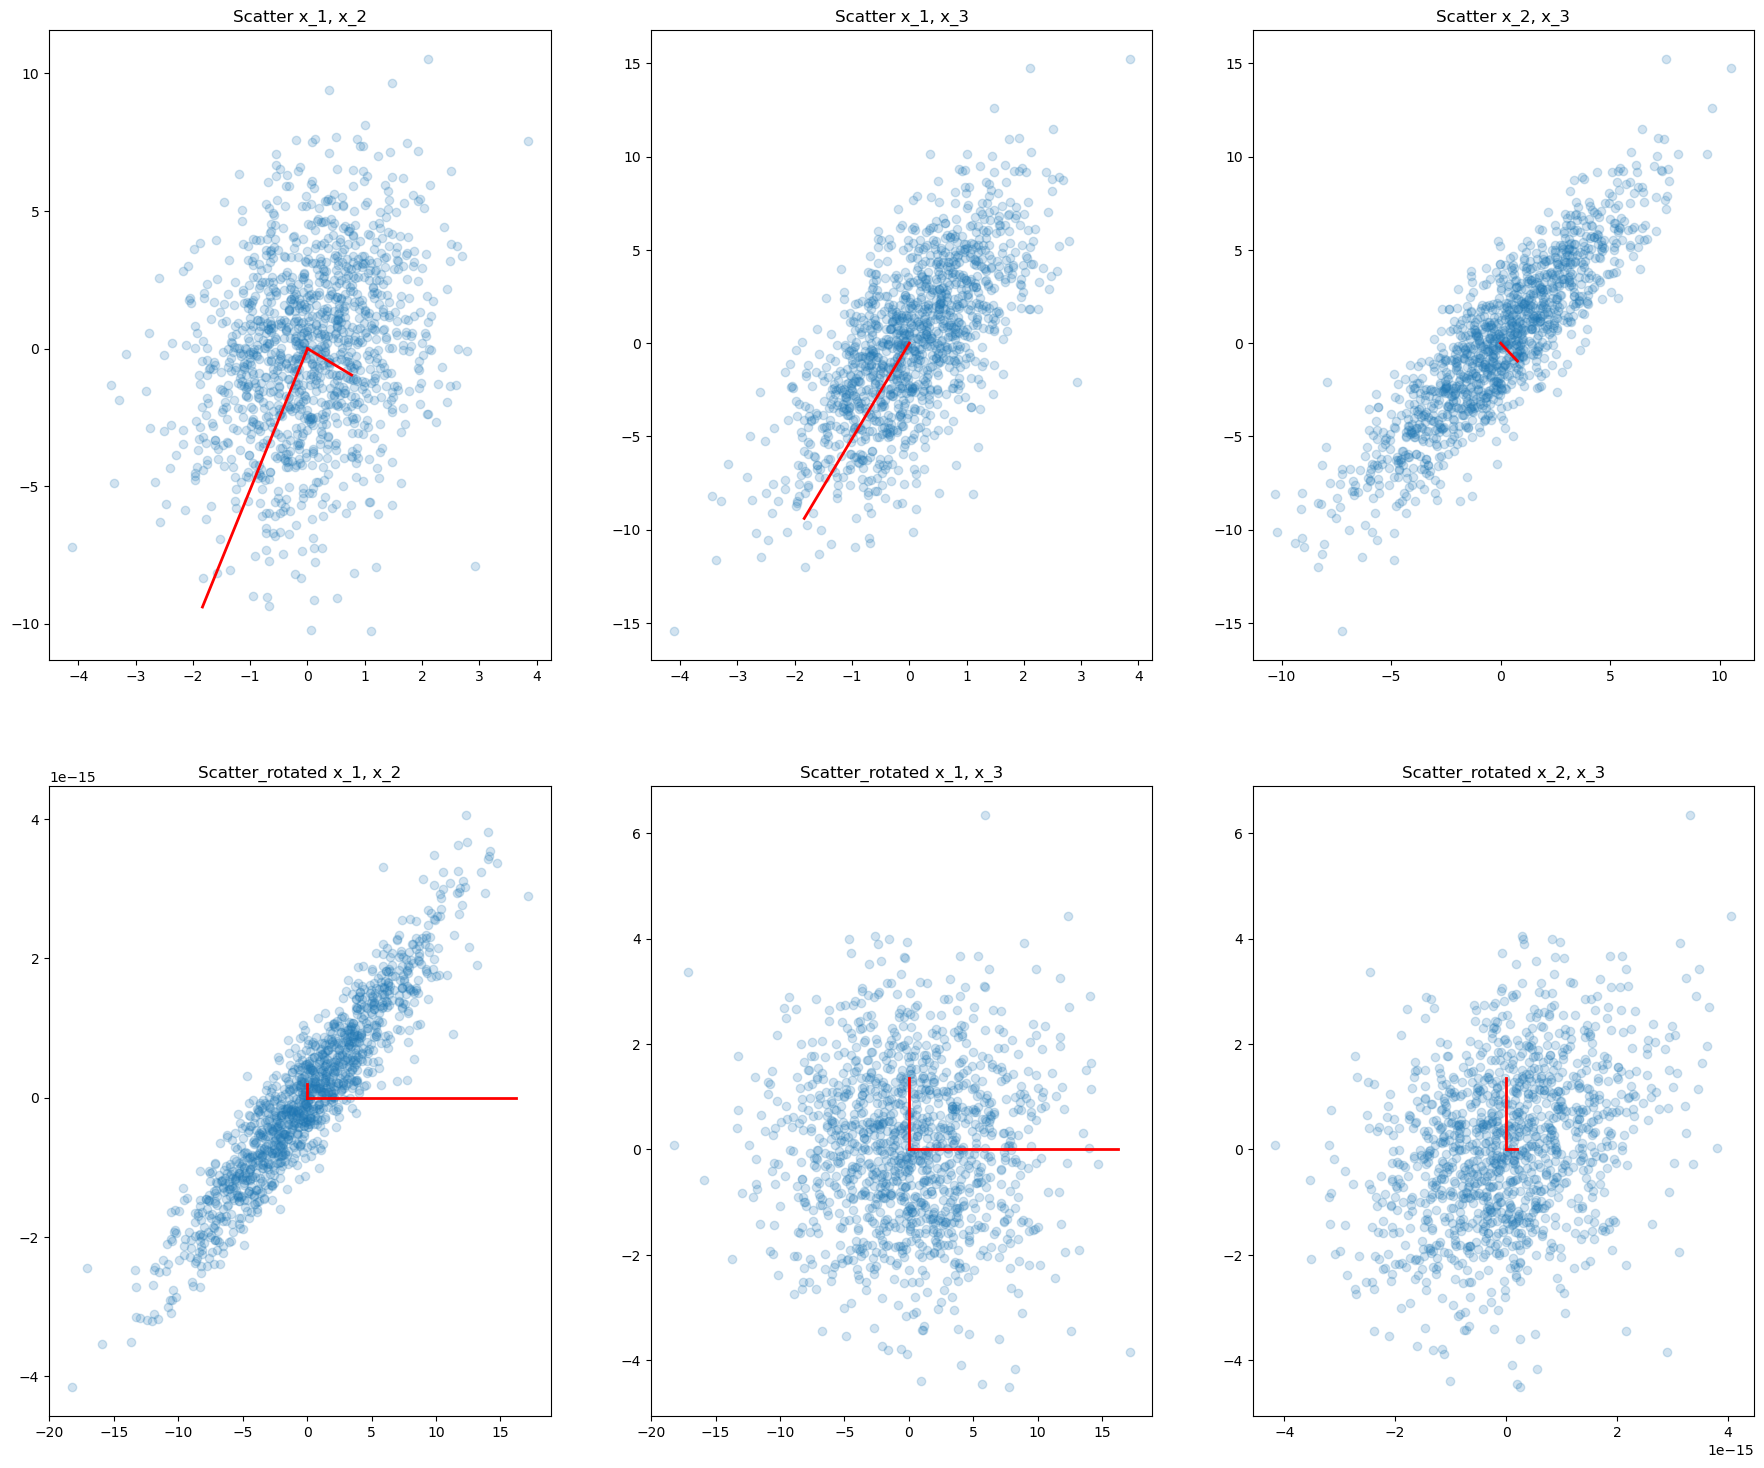

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd

N = 1234
x_1 = np.random.normal(0,1,N)
x_2 = x_1 + np.random.normal(0,3,N)
x_3 = 2*x_1+x_2

M = [x_1,x_2,x_3]

print(np.cov(M),"\n")

val, vec = la.eig(np.cov(M))
print(np.real_if_close(val))
print(vec)

U, spectrum, Vt = la.svd(np.cov(M))
print(spectrum,'\n')
print(U)
val = spectrum #np.sort(np.real_if_close(val))[::-1]
scale_factor = 0.6

gridsize = (2, 3)
fig = plt.figure(figsize = (22,18), facecolor='white')
ax0 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax0.set_title("Scatter x_1, x_2")
ax0.scatter(M[0], M[1], alpha=0.2)

for li, vi in zip([val[0],val[1]], [U.T[0],U.T[1]]):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax1 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax1.set_title("Scatter x_1, x_3")
ax1.scatter(M[0], M[2], alpha=0.2)

for li, vi in zip([val[0],val[2]], [U.T[0],U.T[2]]):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax2 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax2.set_title("Scatter x_2, x_3")
ax2.scatter(M[1], M[2], alpha=0.2)

for li, vi in zip([val[1],val[2]], [U.T[1],U.T[2]]):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    
    
normalization_factor = np.sum(val)
norm_val = val/normalization_factor
    
print(f"\nThe variability of the dataset is: {round(norm_val[0]*100,2)}% for x_1, {round(norm_val[1]*100,2)}% for x_2, {abs(round(norm_val[2]*100,2))}% for x_3\n")

L = np.diag(np.cov(M))
print(L,'\n')

R = np.cov(M)
R[0,0] = 0
print(R,'\n')

l0, V0 = np.linalg.eig(np.dot(M, np.array(M).T)/(N-1))
#l0 = np.sort(l0)[::-1]
Mp = np.dot(V0.T,M)
ax01 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)
ax01.set_title("Scatter_rotated x_1, x_2")
ax01.scatter(Mp[0], Mp[1], alpha=0.2)

for li, vi in zip([l0[0],l0[1]], np.diag([1]*3)):
    # the line is defined by means of its beginning and its end 
    ax01.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax11 = plt.subplot2grid(gridsize, (1, 1), colspan=1, rowspan=1)
ax11.set_title("Scatter_rotated x_1, x_3")
ax11.scatter(Mp[0], Mp[2], alpha=0.2)

for li, vi in zip([l0[0],l0[2]], np.diag([1]*3)):
    # the line is defined by means of its beginning and its end 
    ax11.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax21 = plt.subplot2grid(gridsize, (1, 2), colspan=1, rowspan=1)
ax21.set_title("Scatter_rotated x_2, x_3")
ax21.scatter(Mp[1], Mp[2], alpha=0.2)

for li, vi in zip([l0[1],l0[2]], np.diag([1]*3)):
    # the line is defined by means of its beginning and its end 
    ax21.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [122]:
df = pd.DataFrame(np.array(M).T)
for i in range(10):
    df[f"n.{i+1}"] = np.random.normal(0,1/51,N)

val_n, vec_n = la.eig(np.cov(df))

print(np.real_if_close(val_n))

normalization_factor_n = np.sum(np.real_if_close(val_n))
normalized_val_n = val_n/normalization_factor_n

print(f"df.T[0]")

print(f"\nThe variability of the dataset is: ")
for i in range(len(df.T)):
    print(f"{round(normalized_val_n[i]*100,2)}% for {df[0][i]}")

[ 2.25963129e+03+0.00000000e+00j  2.16207619e+02+0.00000000e+00j
  4.56124804e-02+0.00000000e+00j ...  6.18132725e-19-5.75579934e-18j
 -1.56706979e-17+0.00000000e+00j  1.90836983e-17+0.00000000e+00j]
df.T[0]

The variability of the dataset is: 
(91.25+0j)% for 2.3231683212648266
(8.73+0j)% for 0.05717921347495431
0j% for -0.7515360981211182
0j% for -2.4742261232275835
0j% for 1.8826794717636617
0j% for 0.8655475834458016
0j% for 0.8332089998353311
0j% for 0.6495332035047762
0j% for 0.146921228323329
0j% for -1.370608939584355
0j% for -0.880200400045703
0j% for 1.7625178321534702
0j% for -0.716739551148126


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [18]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2024-12-11 11:11:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/montagnn/data/magic04.data.2’

magic04.data.2          [    <=>             ]   1.41M  1.46MB/s    in 1.0s    

2024-12-11 11:11:14 (1.46 MB/s) - ‘/home/montagnn/data/magic04.data.2’ saved [1477391]

--2024-12-11 11:11:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/montagnn/data/magic04.names.3’

magic04.names.3         [ <=>                ]   5.27K  --.-KB/s    in 0s